### DATA SCIENCE & ANALYTICS PROJECT COMPETITION

#### Problem Statement:
* Domain: Supply Chain / Logistics
* Given the data inputs for a shipment, classify whether the delivery has a late delivery risk or not.

#### Importing Dependancies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Milestone 1 - Data Collection

Dataset - https://www.kaggle.com/shashwatwork/dataco-smart-supply-chain-for-big-data-analysis

* A DataSet of Supply Chains used by the company DataCo Global is  used for this analysis.
* The dataset was collected from Kaggle datasets.
* The dataset is a .csv (Comma Separated Value) file with 53 columns and 180519 records.
* The dataset contains details about the Logistics and Shipping management of the company DataCo Global.

In [2]:
df = pd.read_csv(r'DataCoSupplyChainDataset.csv',encoding="ISO-8859-1")

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
df.head(3)

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Email,Customer Fname,Customer Id,Customer Lname,Customer Password,Customer Segment,Customer State,Customer Street,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Customer Id,order date (DateOrders),Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Cally,20755,Holloway,XXXXXXXXX,Consumer,PR,5365 Noble Nectar Island,725.0,2,Fitness,18.251453,-66.037056,Pacific Asia,Bekasi,Indonesia,20755,1/31/2018 22:56,77202,1360,13.110000,0.04,180517,327.75,0.29,1,327.75,314.640015,91.250000,Southeast Asia,Java Occidental,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Irene,19492,Luna,XXXXXXXXX,Consumer,PR,2679 Rustic Loop,725.0,2,Fitness,18.279451,-66.037064,Pacific Asia,Bikaner,India,19492,1/13/2018 12:27,75939,1360,16.389999,0.05,179254,327.75,-0.80,1,327.75,311.359985,-249.089996,South Asia,Rajastán,PENDING,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,EE. UU.,XXXXXXXXX,Gillian,19491,Maldonado,XXXXXXXXX,Consumer,CA,8510 Round Bear Gate,95125.0,2,Fitness,37.292233,-121.881279,Pacific Asia,Bikaner,India,19491,1/13/2018 12:06,75938,1360,18.030001,0.06,179253,327.75,-0.80,1,327.75,309.720001,-247.779999,South Asia,Rajastán,CLOSED,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class


In [5]:
df.tail(3)

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Email,Customer Fname,Customer Id,Customer Lname,Customer Password,Customer Segment,Customer State,Customer Street,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Customer Id,order date (DateOrders),Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
180516,TRANSFER,5,4,141.110001,391.980011,Late delivery,1,45,Fishing,Bristol,EE. UU.,XXXXXXXXX,John,291,Smith,XXXXXXXXX,Corporate,CT,97 Burning Landing,6010.0,7,Fan Shop,41.629959,-72.967155,Pacific Asia,Adelaide,Australia,291,1/15/2016 21:00,26024,1004,8.0,0.02,65129,399.980011,0.36,1,399.980011,391.980011,141.110001,Oceania,Australia del Sur,PENDING,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/20/2016 21:00,Standard Class
180517,PAYMENT,3,4,186.229996,387.980011,Advance shipping,0,45,Fishing,Caguas,Puerto Rico,XXXXXXXXX,Mary,2813,Smith,XXXXXXXXX,Consumer,PR,2585 Silent Autumn Landing,725.0,7,Fan Shop,18.213350,-66.370575,Pacific Asia,Adelaide,Australia,2813,1/15/2016 20:18,26022,1004,12.0,0.03,65126,399.980011,0.48,1,399.980011,387.980011,186.229996,Oceania,Australia del Sur,PENDING_PAYMENT,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/18/2016 20:18,Standard Class
180518,PAYMENT,4,4,168.949997,383.980011,Shipping on time,0,45,Fishing,Caguas,Puerto Rico,XXXXXXXXX,Andrea,7547,Ortega,XXXXXXXXX,Consumer,PR,697 Little Meadow,725.0,7,Fan Shop,18.290380,-66.370613,Pacific Asia,Nagercoil,India,7547,1/15/2016 18:54,26018,1004,16.0,0.04,65113,399.980011,0.44,1,399.980011,383.980011,168.949997,South Asia,Tamil Nadu,PENDING_PAYMENT,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/19/2016 18:54,Standard Class


In [6]:
df.shape

(180519, 53)

In [7]:
df.columns

Index(['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)',
       'Benefit per order', 'Sales per customer', 'Delivery Status',
       'Late_delivery_risk', 'Category Id', 'Category Name', 'Customer City',
       'Customer Country', 'Customer Email', 'Customer Fname', 'Customer Id',
       'Customer Lname', 'Customer Password', 'Customer Segment',
       'Customer State', 'Customer Street', 'Customer Zipcode',
       'Department Id', 'Department Name', 'Latitude', 'Longitude', 'Market',
       'Order City', 'Order Country', 'Order Customer Id',
       'order date (DateOrders)', 'Order Id', 'Order Item Cardprod Id',
       'Order Item Discount', 'Order Item Discount Rate', 'Order Item Id',
       'Order Item Product Price', 'Order Item Profit Ratio',
       'Order Item Quantity', 'Sales', 'Order Item Total',
       'Order Profit Per Order', 'Order Region', 'Order State', 'Order Status',
       'Order Zipcode', 'Product Card Id', 'Product Category Id',
       'Product De

#### Description of the Dataset

In [8]:
df_desc = pd.read_csv(r"DescriptionDataCoSupplyChain.csv")
df_desc

,FIELDS,DESCRIPTION
0,Type,: Type of transaction made
1,Days for shipping (real),: Actual shipping days of the purchased product
2,Days for shipment (scheduled),: Days of scheduled delivery of the purchased...
3,Benefit per order,: Earnings per order placed
4,Sales per customer,: Total sales per customer made per customer
5,Delivery Status,: Delivery status of orders: Advance shipping...
6,Late_delivery_risk,: Categorical variable that indicates if send...
7,Category Id,: Product category code
8,Category Name,: Description of the product category
9,Customer City,: City where the customer made the purchase


In [9]:
df_desc['DESCRIPTION'][6] #description of Late Delivery Risk

':  Categorical variable that indicates if sending is late (1), it is not late (0).'

### Milestone 2 - Data Preprocessing

In [10]:
df.columns

Index(['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)',
       'Benefit per order', 'Sales per customer', 'Delivery Status',
       'Late_delivery_risk', 'Category Id', 'Category Name', 'Customer City',
       'Customer Country', 'Customer Email', 'Customer Fname', 'Customer Id',
       'Customer Lname', 'Customer Password', 'Customer Segment',
       'Customer State', 'Customer Street', 'Customer Zipcode',
       'Department Id', 'Department Name', 'Latitude', 'Longitude', 'Market',
       'Order City', 'Order Country', 'Order Customer Id',
       'order date (DateOrders)', 'Order Id', 'Order Item Cardprod Id',
       'Order Item Discount', 'Order Item Discount Rate', 'Order Item Id',
       'Order Item Product Price', 'Order Item Profit Ratio',
       'Order Item Quantity', 'Sales', 'Order Item Total',
       'Order Profit Per Order', 'Order Region', 'Order State', 'Order Status',
       'Order Zipcode', 'Product Card Id', 'Product Category Id',
       'Product De

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 53 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Id                    180519 non-null  int64  
 8   Category Name                  180519 non-null  object 
 9   Customer City                  180519 non-null  object 
 10  Customer Country               180519 non-null  object 
 11  Customer Email                 180519 non-null  object 
 12  Customer Fname                

In [12]:
def data_info(data):
    print('Number of Columns in the dataset: ',data.shape[1])
    print('Number of rows in the dataset: ',data.shape[0])
    print('Total number of datapoints in the dataset:',data.size)
    numerical_features = [f for f in data.columns if data[f].dtypes!='O']
    print('Count of Numerical Features:',len(numerical_features))
    cat_features = [c for c in data.columns if data[c].dtypes=='O']
    print('Count of Categorical Features:',len(cat_features))
data_info(df)

Number of Columns in the dataset:  53
Number of rows in the dataset:  180519
Total number of datapoints in the dataset: 9567507
Count of Numerical Features: 29
Count of Categorical Features: 24


In [13]:
df['Days for shipping (real)'].value_counts()

2    56618
3    28765
6    28723
4    28513
5    28163
0     5080
1     4657
Name: Days for shipping (real), dtype: int64

In [14]:
df['Days for shipment (scheduled)'].value_counts()

4    107752
2     35216
1     27814
0      9737
Name: Days for shipment (scheduled), dtype: int64

In [15]:
df['Delivery Status'].value_counts()

Late delivery        98977
Advance shipping     41592
Shipping on time     32196
Shipping canceled     7754
Name: Delivery Status, dtype: int64

In [16]:
df['Late_delivery_risk'].value_counts()

1    98977
0    81542
Name: Late_delivery_risk, dtype: int64

#### 2.1 Handling Missing Values

In [17]:
df.isnull().sum()

Type                                  0
Days for shipping (real)              0
Days for shipment (scheduled)         0
Benefit per order                     0
Sales per customer                    0
Delivery Status                       0
Late_delivery_risk                    0
Category Id                           0
Category Name                         0
Customer City                         0
Customer Country                      0
Customer Email                        0
Customer Fname                        0
Customer Id                           0
Customer Lname                        8
Customer Password                     0
Customer Segment                      0
Customer State                        0
Customer Street                       0
Customer Zipcode                      3
Department Id                         0
Department Name                       0
Latitude                              0
Longitude                             0
Market                                0


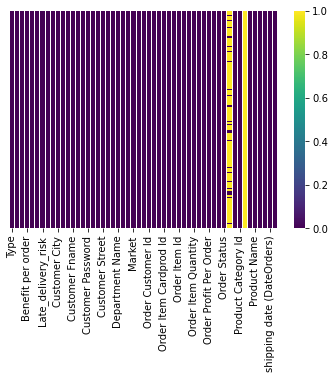

In [18]:
sns.heatmap(df.isnull(),yticklabels=False,cmap="viridis")

* The available dataset consists of some missing values for 'Customer Lname', 'Customer Zipcode', 'Order Zipcode' and Product Description.
* Since there are huge number of missing values in Product Desc and Order Zipcode, these columns are better to be dropped. 
* Customer LastName can be filled with NA category. 
* Customer Zipcode filled using the Customer City's corresponding Zipcode.

In [19]:
#dropping Order Zipcode and Product Desc
new_df = df.drop(['Order Zipcode','Product Description'],axis=1)

In [20]:
new_df.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Email,Customer Fname,Customer Id,Customer Lname,Customer Password,Customer Segment,Customer State,Customer Street,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Customer Id,order date (DateOrders),Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Product Card Id,Product Category Id,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Cally,20755,Holloway,XXXXXXXXX,Consumer,PR,5365 Noble Nectar Island,725.0,2,Fitness,18.251453,-66.037056,Pacific Asia,Bekasi,Indonesia,20755,1/31/2018 22:56,77202,1360,13.110000,0.04,180517,327.75,0.29,1,327.75,314.640015,91.250000,Southeast Asia,Java Occidental,COMPLETE,1360,73,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Irene,19492,Luna,XXXXXXXXX,Consumer,PR,2679 Rustic Loop,725.0,2,Fitness,18.279451,-66.037064,Pacific Asia,Bikaner,India,19492,1/13/2018 12:27,75939,1360,16.389999,0.05,179254,327.75,-0.80,1,327.75,311.359985,-249.089996,South Asia,Rajastán,PENDING,1360,73,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,EE. UU.,XXXXXXXXX,Gillian,19491,Maldonado,XXXXXXXXX,Consumer,CA,8510 Round Bear Gate,95125.0,2,Fitness,37.292233,-121.881279,Pacific Asia,Bikaner,India,19491,1/13/2018 12:06,75938,1360,18.030001,0.06,179253,327.75,-0.80,1,327.75,309.720001,-247.779999,South Asia,Rajastán,CLOSED,1360,73,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,EE. UU.,XXXXXXXXX,Tana,19490,Tate,XXXXXXXXX,Home Office,CA,3200 Amber Bend,90027.0,2,Fitness,34.125946,-118.291016,Pacific Asia,Townsville,Australia,19490,1/13/2018 11:45,75937,1360,22.940001,0.07,179252,327.75,0.08,1,327.75,304.809998,22.860001,Oceania,Queensland,COMPLETE,1360,73,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Orli,19489,Hendricks,XXXXXXXXX,Corporate,PR,8671 Iron Anchor Corners,725.0,2,Fitness,18.253769,-66.037048,Pacific Asia,Townsville,Australia,19489,1/13/2018 11:24,75936,1360,29.500000,0.09,179251,327.75,0.45,1,327.75,298.250000,134.210007,Oceania,Queensland,PENDING_PAYMENT,1360,73,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


In [21]:
new_df.shape  #two columns reduced 

(180519, 51)

In [22]:
#missing data handling for Customer Lname 
new_df['Customer Lname'] = new_df['Customer Lname'].fillna('NA')

In [23]:
new_df[new_df['Customer Lname'].isnull()]

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Email,Customer Fname,Customer Id,Customer Lname,Customer Password,Customer Segment,Customer State,Customer Street,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Customer Id,order date (DateOrders),Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Product Card Id,Product Category Id,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode


In [24]:
#missing data handling for Customer Zipcode 
new_df[new_df['Customer Zipcode'].isnull()]['Customer City']

35704    CA
46440    CA
82511    CA
Name: Customer City, dtype: object

In [25]:
new_df[new_df['Customer City']=='CA']

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Email,Customer Fname,Customer Id,Customer Lname,Customer Password,Customer Segment,Customer State,Customer Street,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Customer Id,order date (DateOrders),Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Product Card Id,Product Category Id,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
35704,DEBIT,2,1,66.379997,189.660004,Late delivery,1,65,Consumer Electronics,CA,EE. UU.,XXXXXXXXX,Sara,14577,Foreman,XXXXXXXXX,Consumer,95758,Elk Grove,NaN,10,Technology,39.134159,-123.718552,Europe,Valence,Francia,14577,11/2/2017 18:31,71024,1352,63.220001,0.25,174339,252.880005,0.35,1,252.880005,189.660004,66.379997,Western Europe,Auvernia-Ródano-Alpes,COMPLETE,1352,65,http://images.acmesports.sports/Industrial+con...,Industrial consumer electronics,252.880005,0,11/4/2017 18:31,First Class
46440,PAYMENT,4,4,10.910000,38.959999,Shipping on time,0,75,Video Games,CA,EE. UU.,XXXXXXXXX,Eugenia,17171,Slater,XXXXXXXXX,Corporate,95758,Elk Grove,NaN,9,Discs Shop,38.408573,-121.449112,Pacific Asia,Manila,Filipinas,17171,12/10/2017 15:18,73618,1362,0.800000,0.02,176933,39.750000,0.28,1,39.750000,38.959999,10.910000,Southeast Asia,Capital Nacional,PENDING_PAYMENT,1362,75,http://images.acmesports.sports/Fighting+video...,Fighting video games,39.750000,0,12/14/2017 15:18,Standard Class
82511,DEBIT,4,4,59.990002,299.959992,Shipping on time,0,63,Children's Clothing,CA,EE. UU.,XXXXXXXXX,Zena,14046,Elliott,XXXXXXXXX,Consumer,91732,El Monte,NaN,4,Apparel,34.071892,-118.013886,Europe,Sheffield,Reino Unido,14046,10/26/2017 0:29,70493,1350,57.139999,0.16,173808,357.100006,0.20,1,357.100006,299.959992,59.990002,Northern Europe,Inglaterra,COMPLETE,1350,63,http://images.acmesports.sports/Children+heaters,Children's heaters,357.100006,0,10/30/2017 0:29,Standard Class


* We see that there is no existing Customer Zipcode for the city 'CA'. Hence, we fill it with '0'.

In [26]:
new_df['Customer Zipcode'] = new_df['Customer Zipcode'].fillna(0)

In [27]:
new_df[new_df['Customer Zipcode'].isnull()]

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Email,Customer Fname,Customer Id,Customer Lname,Customer Password,Customer Segment,Customer State,Customer Street,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Customer Id,order date (DateOrders),Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Product Card Id,Product Category Id,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode


In [28]:
new_df.isnull().sum()  #all Null values has been removed

Type                             0
Days for shipping (real)         0
Days for shipment (scheduled)    0
Benefit per order                0
Sales per customer               0
Delivery Status                  0
Late_delivery_risk               0
Category Id                      0
Category Name                    0
Customer City                    0
Customer Country                 0
Customer Email                   0
Customer Fname                   0
Customer Id                      0
Customer Lname                   0
Customer Password                0
Customer Segment                 0
Customer State                   0
Customer Street                  0
Customer Zipcode                 0
Department Id                    0
Department Name                  0
Latitude                         0
Longitude                        0
Market                           0
Order City                       0
Order Country                    0
Order Customer Id                0
order date (DateOrde

#### 2.2 Handling Outliers

In [29]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 51 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Id                    180519 non-null  int64  
 8   Category Name                  180519 non-null  object 
 9   Customer City                  180519 non-null  object 
 10  Customer Country               180519 non-null  object 
 11  Customer Email                 180519 non-null  object 
 12  Customer Fname                

In [30]:
new_df.columns

Index(['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)',
       'Benefit per order', 'Sales per customer', 'Delivery Status',
       'Late_delivery_risk', 'Category Id', 'Category Name', 'Customer City',
       'Customer Country', 'Customer Email', 'Customer Fname', 'Customer Id',
       'Customer Lname', 'Customer Password', 'Customer Segment',
       'Customer State', 'Customer Street', 'Customer Zipcode',
       'Department Id', 'Department Name', 'Latitude', 'Longitude', 'Market',
       'Order City', 'Order Country', 'Order Customer Id',
       'order date (DateOrders)', 'Order Id', 'Order Item Cardprod Id',
       'Order Item Discount', 'Order Item Discount Rate', 'Order Item Id',
       'Order Item Product Price', 'Order Item Profit Ratio',
       'Order Item Quantity', 'Sales', 'Order Item Total',
       'Order Profit Per Order', 'Order Region', 'Order State', 'Order Status',
       'Product Card Id', 'Product Category Id', 'Product Image',
       'Product Na

In [31]:
data_info(new_df)

Number of Columns in the dataset:  51
Number of rows in the dataset:  180519
Total number of datapoints in the dataset: 9206469
Count of Numerical Features: 27
Count of Categorical Features: 24


In [32]:
num_feat = [f for f in new_df.columns if new_df[f].dtypes!='O']

In [33]:
#fetching the numerical columns
num_feat

['Days for shipping (real)',
 'Days for shipment (scheduled)',
 'Benefit per order',
 'Sales per customer',
 'Late_delivery_risk',
 'Category Id',
 'Customer Id',
 'Customer Zipcode',
 'Department Id',
 'Latitude',
 'Longitude',
 'Order Customer Id',
 'Order Id',
 'Order Item Cardprod Id',
 'Order Item Discount',
 'Order Item Discount Rate',
 'Order Item Id',
 'Order Item Product Price',
 'Order Item Profit Ratio',
 'Order Item Quantity',
 'Sales',
 'Order Item Total',
 'Order Profit Per Order',
 'Product Card Id',
 'Product Category Id',
 'Product Price',
 'Product Status']

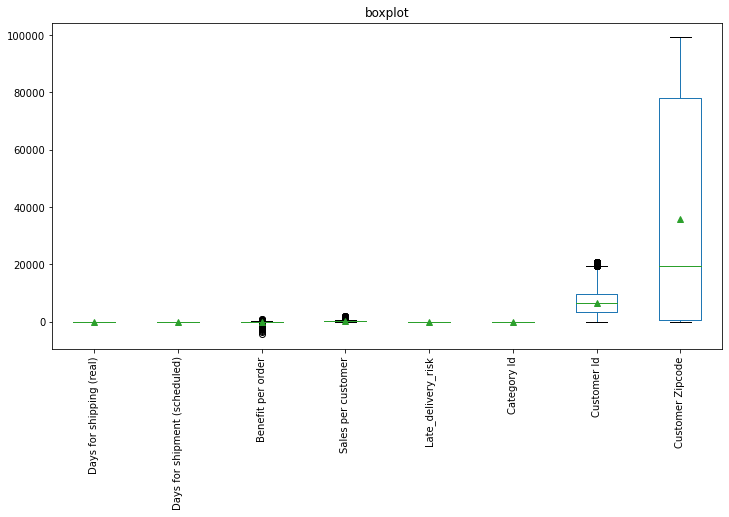

In [34]:
ax1 = new_df[['Days for shipping (real)',
 'Days for shipment (scheduled)',
 'Benefit per order',
 'Sales per customer',
 'Late_delivery_risk',
 'Category Id',
 'Customer Id',
 'Customer Zipcode'
 ]].plot(kind='box', title='boxplot', showmeans=True,rot=90,figsize=(12,6))

plt.show()

**Insights:**
* Days for shipping real and scheduled, late_delivery_risk and customer zipcode are the features that possibly matters to our modelling. They doesn't have outliers.

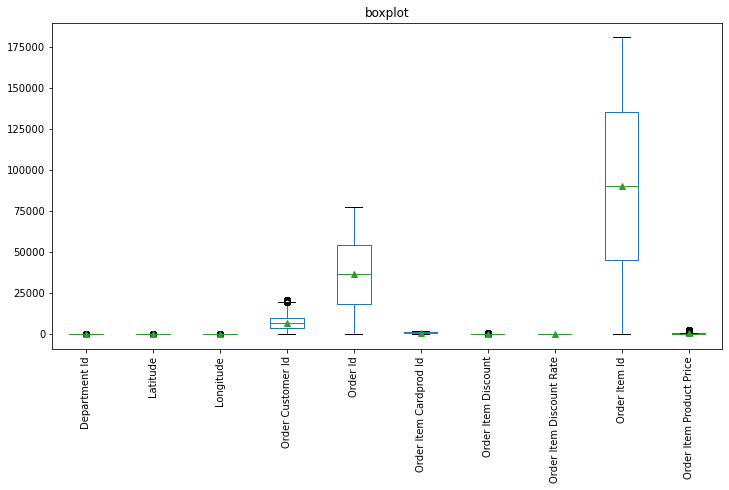

In [35]:
ax2 = new_df[['Department Id',
 'Latitude',
 'Longitude',
 'Order Customer Id',
 'Order Id',
 'Order Item Cardprod Id',
 'Order Item Discount',
 'Order Item Discount Rate',
 'Order Item Id',
 'Order Item Product Price'
 ]].plot(kind='box', title='boxplot', showmeans=True,rot=90,figsize=(12,6))

plt.show()

In [36]:
new_df['Order Item Product Price'].nlargest(5)

12606    1999.98999
13343    1999.98999
48281    1999.98999
59847    1999.98999
63990    1999.98999
Name: Order Item Product Price, dtype: float64

In [37]:
new_df[new_df['Order Item Product Price'] >= 1500]['Late_delivery_risk'].value_counts()

1    230
0    227
Name: Late_delivery_risk, dtype: int64

In [38]:
new_df['Order Item Product Price'].nsmallest(5)

32564    9.99
32565    9.99
32566    9.99
32567    9.99
32568    9.99
Name: Order Item Product Price, dtype: float64

In [39]:
new_df[new_df['Order Item Product Price'] < 100]['Late_delivery_risk'].value_counts()

1    57371
0    47108
Name: Late_delivery_risk, dtype: int64

In [40]:
new_df[(new_df['Order Item Product Price'] < 1000) & (new_df['Order Item Product Price'] > 500)]['Late_delivery_risk'].value_counts()

1    289
0    226
Name: Late_delivery_risk, dtype: int64

**Insights:**
* 230 out of 457 top priced orders have late delivery risk while only 227 don't.
* Considering about 1 lakh low priced orders, the late delivery risk ratio is the same. 
* The ratio is almost similar in the mid-range of order prices as well. 
* Hence, we can avoid the feature for calculating late delivery risk.
* Furthermore, none of the features in the above boxplot actively contributes to the analysis. Hence, there is no need to handle their outliers.

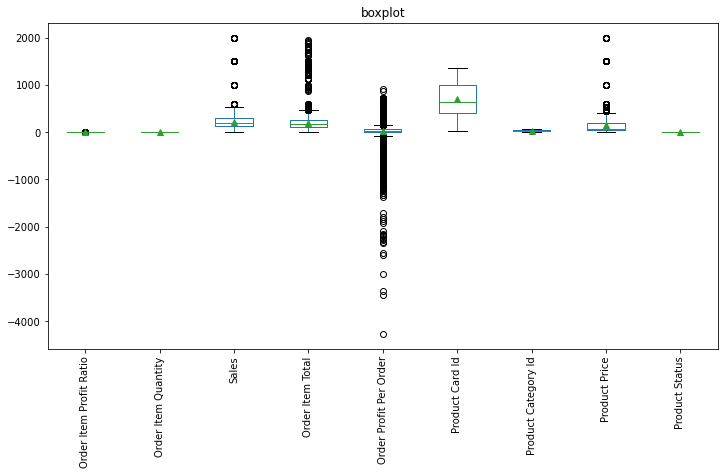

In [41]:
ax3 = new_df[['Order Item Profit Ratio',
 'Order Item Quantity',
 'Sales',
 'Order Item Total',
 'Order Profit Per Order',
 'Product Card Id',
 'Product Category Id',
 'Product Price',
 'Product Status'
 ]].plot(kind='box', title='boxplot', showmeans=True,rot=90,figsize=(12,6))

plt.show()

In [42]:
new_df['Order Item Quantity'].value_counts()

1    99134
5    20385
3    20350
4    20335
2    20315
Name: Order Item Quantity, dtype: int64

In [43]:
new_df[new_df['Order Item Quantity']==1]['Late_delivery_risk'].value_counts()

1    54405
0    44729
Name: Late_delivery_risk, dtype: int64

In [44]:
new_df[new_df['Order Item Quantity']==2]['Late_delivery_risk'].value_counts()

1    11039
0     9276
Name: Late_delivery_risk, dtype: int64

In [45]:
new_df[new_df['Order Item Quantity']==3]['Late_delivery_risk'].value_counts()

1    11216
0     9134
Name: Late_delivery_risk, dtype: int64

In [46]:
new_df[new_df['Order Item Quantity']==4]['Late_delivery_risk'].value_counts()

1    11147
0     9188
Name: Late_delivery_risk, dtype: int64

In [47]:
new_df[new_df['Order Item Quantity']==5]['Late_delivery_risk'].value_counts()

1    11170
0     9215
Name: Late_delivery_risk, dtype: int64

In [48]:
new_df['Product Price'].nlargest(5)

12606    1999.98999
13343    1999.98999
48281    1999.98999
59847    1999.98999
63990    1999.98999
Name: Product Price, dtype: float64

In [49]:
new_df['Product Price'].nsmallest(5)

32564    9.99
32565    9.99
32566    9.99
32567    9.99
32568    9.99
Name: Product Price, dtype: float64

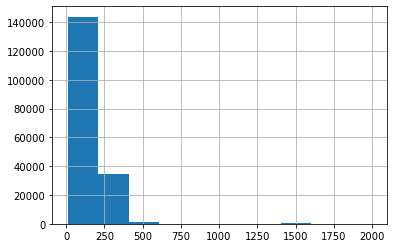

In [50]:
df['Product Price'].hist()

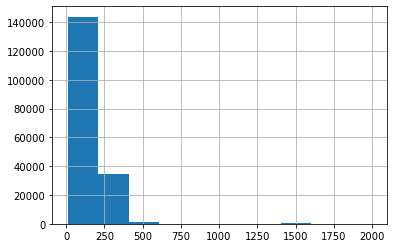

In [51]:
df['Order Item Product Price'].hist()

**Insights:**
* We see that the Order Item Quantity doesn't majorly impact the late delivery risk.
* 54% of the shipments have a late delivery risk in all value counts under Order Item Quantity.
* We also see that Product price and Item Order price depict the same values. 

#### Findings:
* None of the relevant features significant to our analysis or modelling seems to posess outliers. 
* Hence the outlier handling method is not used.
* However, to have a feel of outlier removal strategy, outliers from Order Item Product Price below

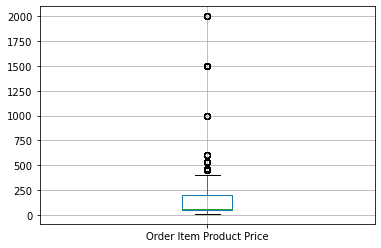

In [52]:
#Outlier removal for  Order Item Product Price
new_df.boxplot(column='Order Item Product Price')

In [53]:
Q1 = new_df['Order Item Product Price'].quantile(0.25)
Q3 = new_df['Order Item Product Price'].quantile(0.75)
IQR = Q3 - Q1
print("The Inter-Quartile Range for Order Item Product Price is",IQR)

The Inter-Quartile Range for Order Item Product Price is 149.9900055


In [54]:
low_lim = Q1 - 1.5 * IQR
upp_lim = Q3 + 1.5 * IQR
print("Lower limit for Order Item Product Price is", low_lim)
print("Upper limit for Order Item Product Price is", upp_lim)
print("Beyond upper and lower limits, the values are classified as Outliers.")

Lower limit for Order Item Product Price is -174.98500825
Upper limit for Order Item Product Price is 424.97501375
Beyond upper and lower limits, the values are classified as Outliers.


In [55]:
#hence the lower limit moves to minus value, we set it to 0 as the lowest discounted price comes at 0 (FREE)
low_lim = 0
upp_lim = Q3 + 1.5 * IQR
print("Lower limit for Order Item Product Price is", low_lim)
print("Upper limit for Order Item Product Price is", upp_lim)
print("Beyond upper and lower limits, the values are classified as Outliers.")

Lower limit for Order Item Product Price is 0
Upper limit for Order Item Product Price is 424.97501375
Beyond upper and lower limits, the values are classified as Outliers.


In [56]:
#catching outliers from the column
outlier = new_df[(new_df['Order Item Product Price'] < 0) | (new_df['Order Item Product Price'] > Q3 + 1.5*IQR)]

In [57]:
outlier.index

Int64Index([   146,    148,    150,    152,    153,    154,    155,    156,
               158,    160,
            ...
            175677, 175678, 175679, 175749, 176668, 176803, 179067, 179070,
            179217, 179240],
           dtype='int64', length=2048)

In [58]:
index_list = list(outlier.index)

In [59]:
sample_df = new_df

In [60]:
sample_df.shape #before outlier removal

(180519, 51)

In [61]:
sample_df = sample_df.drop(index_list)

In [62]:
sample_df.shape #after outlier removal

(178471, 51)

**Findings:**
* 2048 Outliers have been identified in the Order Item Product Price column beyond the limits.
* The outlier records were dropped from the dataset.
* Number of rows reduced to 178471.

#### 2.3 Feature Reduction / Feature Engineering

* Feature engineering is the process of using domain knowledge to extract features from raw data. The motivation is to use these extra features to improve the quality of results from a machine learning process, compared with supplying only the raw data to the machine learning process. [Wikipedia]
* Steps like Imputation and Encoding comes under Feature Engineering.

https://towardsdatascience.com/feature-engineering-for-machine-learning-3a5e293a5114

In [63]:
corr_mat = new_df.corr()

In [64]:
corr_mat

,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Late_delivery_risk,Category Id,Customer Id,Customer Zipcode,Department Id,Latitude,Longitude,Order Customer Id,Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Product Card Id,Product Category Id,Product Price,Product Status
Days for shipping (real),1.000000,0.515880,-0.005101,0.001757,0.401415,-0.000348,0.003432,0.000114,-0.001631,-0.004073,0.003911,0.003432,-0.001711,-0.000859,0.002231,0.001467,-0.001769,0.002185,-0.004638,-0.000811,0.001962,0.001757,-0.005101,-0.000859,-0.000348,0.002185,NaN
Days for shipment (scheduled),0.515880,1.000000,-0.000185,0.006445,-0.369352,-0.000367,0.000899,-0.003020,-0.000262,-0.005300,0.003675,0.000899,-0.001878,-0.000431,0.002897,0.000065,-0.001848,0.006912,-0.001822,-0.002925,0.006327,0.006445,-0.000185,-0.000431,-0.000367,0.006912,NaN
Benefit per order,-0.005101,-0.000185,1.000000,0.133484,-0.003727,0.031889,0.009354,0.002231,0.031442,0.000338,-0.002521,0.009354,0.013716,0.033161,0.064756,-0.018644,0.013556,0.103459,0.823689,0.015696,0.131816,0.133484,1.000000,0.033161,0.031889,0.103459,NaN
Sales per customer,0.001757,0.006445,0.133484,1.000000,-0.003791,0.225201,0.060181,-0.001303,0.232367,-0.000223,0.001444,0.060181,0.079000,0.236367,0.498734,-0.119469,0.078176,0.781781,-0.001439,0.105413,0.989744,1.000000,0.133484,0.236367,0.225201,0.781781,NaN
Late_delivery_risk,0.401415,-0.369352,-0.003727,-0.003791,1.000000,0.001752,0.001484,0.003155,0.001077,0.000679,-0.001915,0.001484,-0.001293,0.001490,-0.000750,0.000404,-0.001376,-0.002175,-0.002316,-0.000139,-0.003564,-0.003791,-0.003727,0.001490,0.001752,-0.002175,NaN
Category Id,-0.000348,-0.000367,0.031889,0.225201,0.001752,1.000000,0.274633,0.002861,0.888835,0.002195,-0.002320,0.274633,0.198496,0.991092,0.140180,0.000572,0.186796,0.461059,-0.001614,-0.302408,0.227483,0.225201,0.031889,0.991092,1.000000,0.461059,NaN
Customer Id,0.003432,0.000899,0.009354,0.060181,0.001484,0.274633,1.000000,0.001989,0.136897,0.002335,-0.005146,1.000000,0.204821,0.228039,0.038490,0.001712,0.191814,0.111118,-0.000337,-0.091328,0.060961,0.060181,0.009354,0.228039,0.274633,0.111118,NaN
Customer Zipcode,0.000114,-0.003020,0.002231,-0.001303,0.003155,0.002861,0.001989,1.000000,0.002856,0.584534,-0.923865,0.001989,-0.001237,0.003142,-0.001876,-0.000144,-0.001234,0.002182,0.003359,-0.006162,-0.001492,-0.001303,0.002231,0.003142,0.002861,0.002182,NaN
Department Id,-0.001631,-0.000262,0.031442,0.232367,0.001077,0.888835,0.136897,0.002856,1.000000,0.002460,-0.002435,0.136897,0.106757,0.906117,0.144617,0.000255,0.101676,0.446743,-0.003044,-0.265437,0.234718,0.232367,0.031442,0.906117,0.888835,0.446743,NaN
Latitude,-0.004073,-0.005300,0.000338,-0.000223,0.000679,0.002195,0.002335,0.584534,0.002460,1.000000,-0.525122,0.002335,-0.002984,0.002031,-0.002997,-0.003889,-0.003058,0.000471,-0.000081,-0.001853,-0.000696,-0.000223,0.000338,0.002031,0.002195,0.000471,NaN


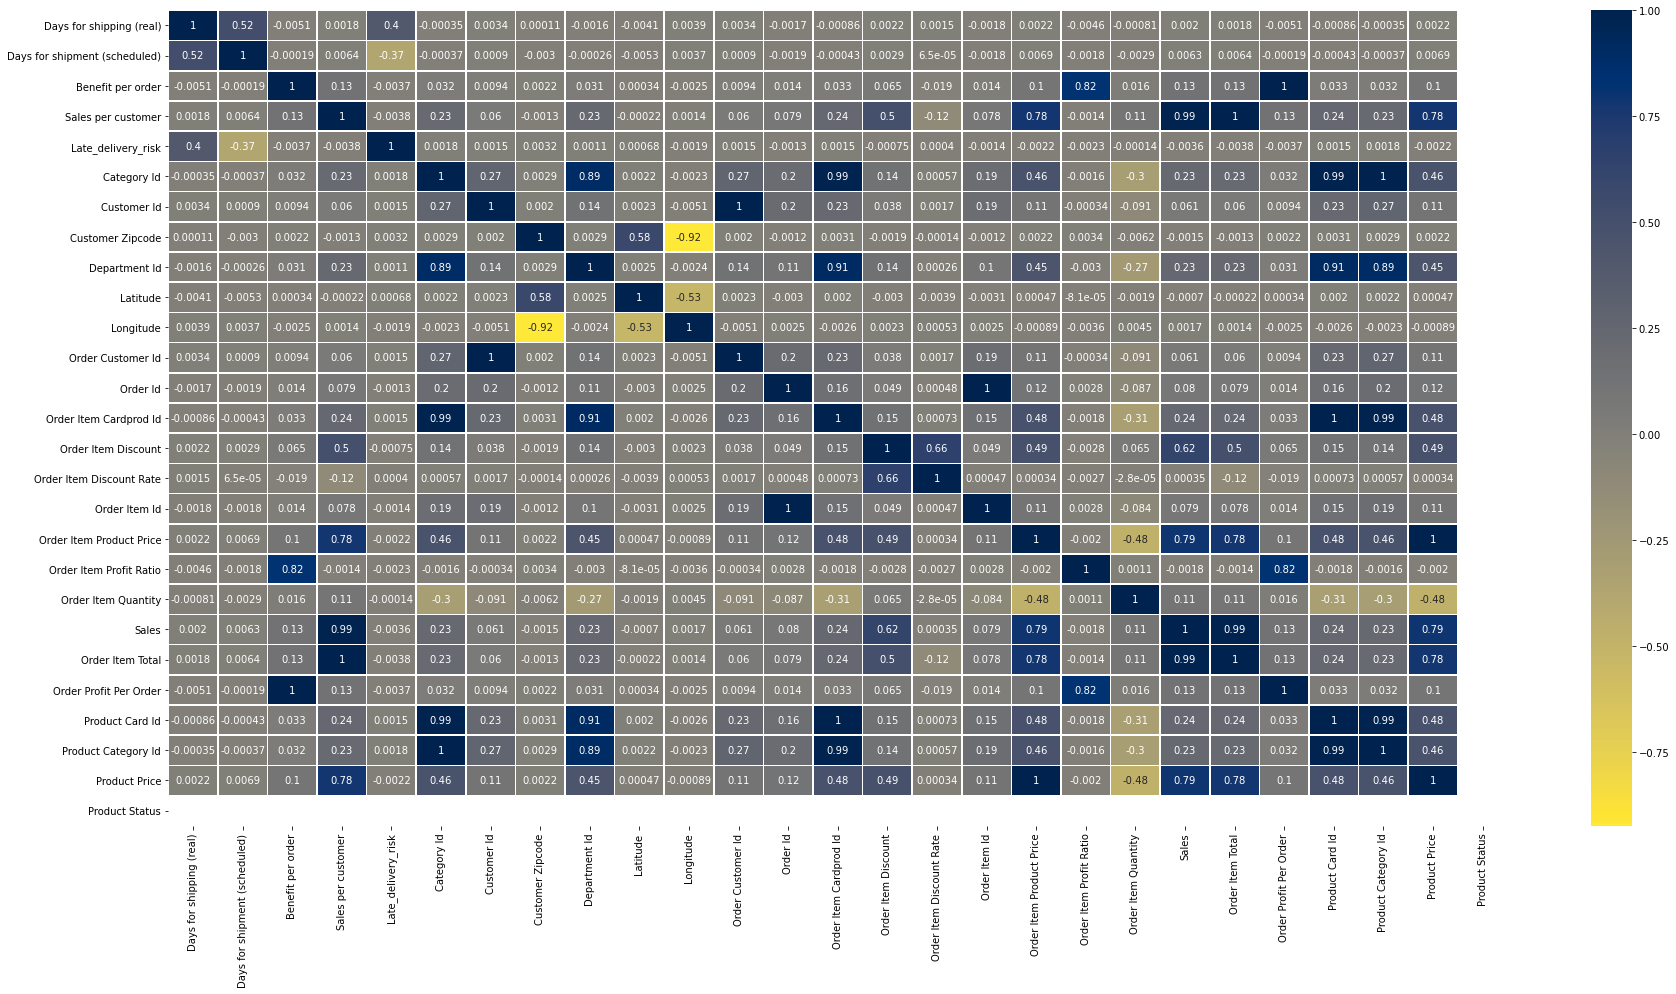

In [65]:
plt.figure(figsize=(30,15))
sns.heatmap(corr_mat,annot=True,linewidths=.5,cmap= 'cividis_r')

**Insights:**
* Late delivery risk is mildly correlated with Days of shipment (real) and Days of shipment (scheduled).
* Customer Zipcode has mild correlation with latitude and strong negative correlation with longitude.
* Other features doesn't contribute strongly to the analysis of our Late Delivery Risk classification.

#### Removing insignificant features (Basic Feature Reduction)
* Since many of the features don't serve any purpose to our further analysis, we drop them.
* Some of the columns like Order City, Order Country and Order Region and Order State are repitition of information.
* Order Region, Order Country and Order City is sufficient. Hence, we remove Order State.

In [66]:
new_df.columns

Index(['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)',
       'Benefit per order', 'Sales per customer', 'Delivery Status',
       'Late_delivery_risk', 'Category Id', 'Category Name', 'Customer City',
       'Customer Country', 'Customer Email', 'Customer Fname', 'Customer Id',
       'Customer Lname', 'Customer Password', 'Customer Segment',
       'Customer State', 'Customer Street', 'Customer Zipcode',
       'Department Id', 'Department Name', 'Latitude', 'Longitude', 'Market',
       'Order City', 'Order Country', 'Order Customer Id',
       'order date (DateOrders)', 'Order Id', 'Order Item Cardprod Id',
       'Order Item Discount', 'Order Item Discount Rate', 'Order Item Id',
       'Order Item Product Price', 'Order Item Profit Ratio',
       'Order Item Quantity', 'Sales', 'Order Item Total',
       'Order Profit Per Order', 'Order Region', 'Order State', 'Order Status',
       'Product Card Id', 'Product Category Id', 'Product Image',
       'Product Na

* Columns or features named named 'Type', 'Benefit per order', 'Sales per customer','Customer Email', 'Customer Fname', 'Customer Id','Customer Lname', 'Customer Password', 'Customer State', 'Customer Street','Latitude', 'Longitude', 'Market','Order Customer Id','Order Id', 'Order Item Cardprod Id','Order Item Discount', 'Order Item Discount Rate', 'Order Item Id','Order Item Product Price', 'Order Item Profit Ratio', 'Sales', 'Order Item Total','Order Profit Per Order', 'Order State', 'Product Card Id', 'Product Category Id', 'Product Image','Product Name', and 'Product Price'.

In [67]:
print("Number of features before basic feature reduction is",new_df.shape[1])

Number of features before basic feature reduction is 51


In [68]:
new_df = new_df.drop([ 'Type', 'Benefit per order', 'Sales per customer','Customer Email', 'Customer Fname', 'Customer Id','Customer Lname', 'Customer Password', 'Customer State', 'Customer Street','Latitude', 'Longitude', 'Market','Order Customer Id','Order Id', 'Order Item Cardprod Id','Order Item Discount', 'Order Item Discount Rate', 'Order Item Id','Order Item Product Price', 'Order Item Profit Ratio', 'Sales', 'Order Item Total','Order Profit Per Order', 'Order State', 'Product Card Id', 'Product Category Id', 'Product Image','Product Name', 'Product Price'],axis=1)

In [69]:
print("Number of features after basic feature reduction is",new_df.shape[1])

Number of features after basic feature reduction is 21


#### Advanced Feature Reduction

In [70]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 21 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Days for shipping (real)       180519 non-null  int64  
 1   Days for shipment (scheduled)  180519 non-null  int64  
 2   Delivery Status                180519 non-null  object 
 3   Late_delivery_risk             180519 non-null  int64  
 4   Category Id                    180519 non-null  int64  
 5   Category Name                  180519 non-null  object 
 6   Customer City                  180519 non-null  object 
 7   Customer Country               180519 non-null  object 
 8   Customer Segment               180519 non-null  object 
 9   Customer Zipcode               180519 non-null  float64
 10  Department Id                  180519 non-null  int64  
 11  Department Name                180519 non-null  object 
 12  Order City                    

In [71]:
#product status 
df_desc[['FIELDS','DESCRIPTION']].iloc[49]

FIELDS                                            Product Status
DESCRIPTION    :  Status of the product stock :If it is 1 not...
Name: 49, dtype: object

In [72]:
df_desc['DESCRIPTION'][49]

':  Status of the product stock :If it is 1 not available , 0 the product is available '

In [73]:
df_desc['DESCRIPTION'][6]

':  Categorical variable that indicates if sending is late (1), it is not late (0).'

In [74]:
new_df[new_df['Product Status']==0]['Late_delivery_risk'].value_counts()

1    98977
0    81542
Name: Late_delivery_risk, dtype: int64

**Insights:**
* All products are in stock.
* Almost similar distribution of delivery risk for products.
* Hence, we can drop this column

In [75]:
#Category Id and Category Name
new_df['Category Id'].unique()

array([73, 17, 29, 24, 13, 12,  9, 41, 37, 38, 44,  3, 18, 43, 65, 62, 64,
        4,  2, 26, 40, 76, 66, 70,  6, 11, 16, 36, 10, 63,  5, 60, 45, 59,
       67, 61, 68,  7, 72, 69, 71, 75, 35, 34, 33, 32, 31, 30, 74, 48, 46],
      dtype=int64)

In [76]:
len(new_df['Category Id'].unique())

51

In [77]:
new_df['Category Name'].unique()

array(['Sporting Goods', 'Cleats', 'Shop By Sport', "Women's Apparel",
       'Electronics', 'Boxing & MMA', 'Cardio Equipment', 'Trade-In',
       "Kids' Golf Clubs", 'Hunting & Shooting', 'Baseball & Softball',
       "Men's Footwear", 'Camping & Hiking', 'Consumer Electronics',
       'Cameras ', 'Computers', 'Basketball', 'Soccer', "Girls' Apparel",
       'Accessories', "Women's Clothing", 'Crafts', "Men's Clothing",
       'Tennis & Racquet', 'Fitness Accessories', 'As Seen on  TV!',
       'Golf Balls', 'Strength Training', "Children's Clothing",
       'Lacrosse', 'Baby ', 'Fishing', 'Books ', 'DVDs', 'CDs ', 'Garden',
       'Hockey', 'Pet Supplies', 'Health and Beauty', 'Music',
       'Video Games', 'Golf Gloves', 'Golf Bags & Carts', 'Golf Shoes',
       'Golf Apparel', "Women's Golf Clubs", "Men's Golf Clubs", 'Toys',
       'Water Sports', 'Indoor/Outdoor Games'], dtype=object)

In [78]:
len(new_df['Category Name'].unique())

50

In [79]:
new_df['Category Name'].value_counts()

Cleats                  24551
Men's Footwear          22246
Women's Apparel         21035
Indoor/Outdoor Games    19298
Fishing                 17325
Water Sports            15540
Camping & Hiking        13729
Cardio Equipment        12487
Shop By Sport           10984
Electronics              3156
Accessories              1780
Golf Balls               1475
Girls' Apparel           1201
Golf Gloves              1070
Trade-In                  974
Video Games               838
Children's Clothing       652
Women's Clothing          650
Baseball & Softball       632
Hockey                    614
Cameras                   592
Toys                      529
Golf Shoes                524
Pet Supplies              492
Garden                    484
Crafts                    484
DVDs                      483
Computers                 442
Golf Apparel              441
Hunting & Shooting        440
Music                     434
Consumer Electronics      431
Boxing & MMA              423
Books     

In [80]:
new_df['Delivery Status'].unique()

array(['Advance shipping', 'Late delivery', 'Shipping on time',
       'Shipping canceled'], dtype=object)

In [81]:
#fetching columns that have late delivery in delivery status
late_delivery = new_df[new_df['Delivery Status'] == 'Late delivery']

#Top ten products with most late deliveries
top_10_late = late_delivery['Category Name'].value_counts().nlargest(10)
top_10_late

Cleats                  13496
Men's Footwear          12121
Women's Apparel         11476
Indoor/Outdoor Games    10565
Fishing                  9516
Water Sports             8517
Camping & Hiking         7487
Cardio Equipment         6805
Shop By Sport            6058
Electronics              1770
Name: Category Name, dtype: int64

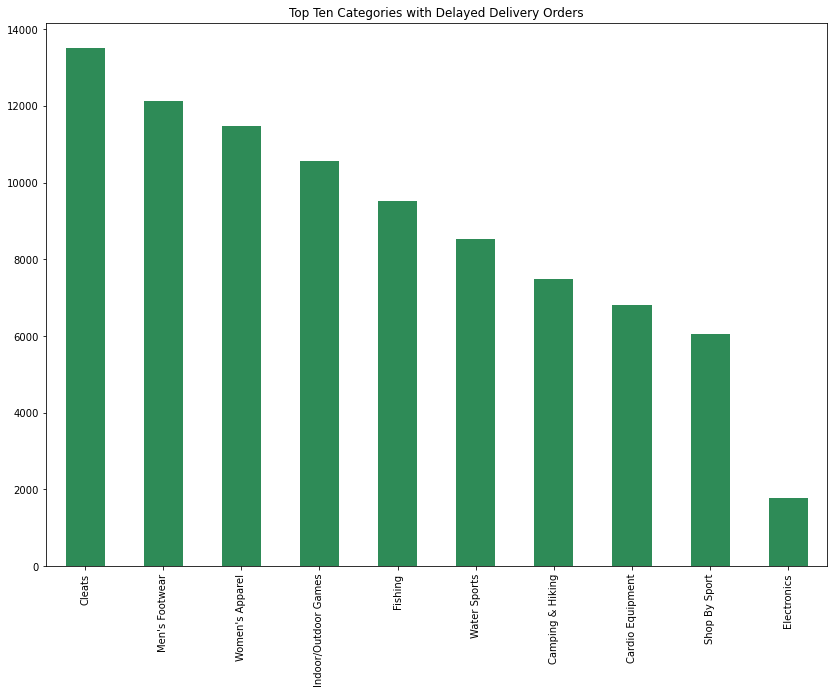

In [82]:
plt.title("Top Ten Categories with Delayed Delivery Orders")
top_10_late.plot.bar(figsize=(14,10),color='seagreen')
plt.show()

**Insights:**
* We see that there is a trend between the categories and late deliveries.
* For almost all Category Name, there is a corresponding Category Id. 
* Hence, we shall remove the category name and keep the category id for further tasks.

##### Comparing the Customer Location and Segment Details
* Now, let's look into the details of Customer City, Customer Country,Customer Zipcode and Customer Segment.
* From the DESCRIPTION Dataframe, we understand that the Customer City and other details provide the details of the order placement. 

In [83]:
new_df['Customer Country'].value_counts()

EE. UU.        111146
Puerto Rico     69373
Name: Customer Country, dtype: int64

In [84]:
new_df[new_df['Customer Country']=='EE. UU.']['Late_delivery_risk'].value_counts()

1    60986
0    50160
Name: Late_delivery_risk, dtype: int64

In [85]:
new_df[new_df['Customer Country']=='Puerto Rico']['Late_delivery_risk'].value_counts()

1    37991
0    31382
Name: Late_delivery_risk, dtype: int64

In [86]:
new_df[new_df['Customer Country']=='Puerto Rico']['Delivery Status'].value_counts()

Late delivery        37991
Advance shipping     16090
Shipping on time     12259
Shipping canceled     3033
Name: Delivery Status, dtype: int64

In [87]:
new_df[new_df['Customer Country']=='EE. UU.']['Delivery Status'].value_counts()

Late delivery        60986
Advance shipping     25502
Shipping on time     19937
Shipping canceled     4721
Name: Delivery Status, dtype: int64

In [88]:
new_df['Customer Segment'].value_counts()

Consumer       93504
Corporate      54789
Home Office    32226
Name: Customer Segment, dtype: int64

In [89]:
new_df[new_df['Customer Segment']=='Consumer']['Late_delivery_risk'].value_counts()

1    51248
0    42256
Name: Late_delivery_risk, dtype: int64

In [90]:
new_df[new_df['Customer Segment']=='Consumer']['Delivery Status'].value_counts()

Late delivery        51248
Advance shipping     21388
Shipping on time     16784
Shipping canceled     4084
Name: Delivery Status, dtype: int64

In [91]:
new_df[new_df['Customer Segment']=='Corporate']['Late_delivery_risk'].value_counts()

1    29982
0    24807
Name: Late_delivery_risk, dtype: int64

In [92]:
new_df[new_df['Customer Segment']=='Corporate']['Delivery Status'].value_counts()

Late delivery        29982
Advance shipping     12856
Shipping on time      9690
Shipping canceled     2261
Name: Delivery Status, dtype: int64

In [93]:
new_df[new_df['Customer Segment']=='Home Office']['Late_delivery_risk'].value_counts()

1    17747
0    14479
Name: Late_delivery_risk, dtype: int64

* We keep the columns Customer Country and Customer Segment for further tasks and drop other two features.

In [94]:
#Department ID and Department Name
new_df['Department Id'].value_counts()

7     66861
4     48998
5     33220
3     14525
6      9686
2      2479
9      2026
10     1465
11      492
8       405
12      362
Name: Department Id, dtype: int64

In [95]:
new_df['Department Name'].value_counts()

Fan Shop              66861
Apparel               48998
Golf                  33220
Footwear              14525
Outdoors               9686
Fitness                2479
Discs Shop             2026
Technology             1465
Pet Shop                492
Book Shop               405
Health and Beauty       362
Name: Department Name, dtype: int64

In [96]:
#Top five products with most late deliveries
top_late_dept = late_delivery['Department Name'].value_counts().nlargest(5)
top_late_dept

Fan Shop    36623
Apparel     26825
Golf        18198
Footwear     7949
Outdoors     5375
Name: Department Name, dtype: int64

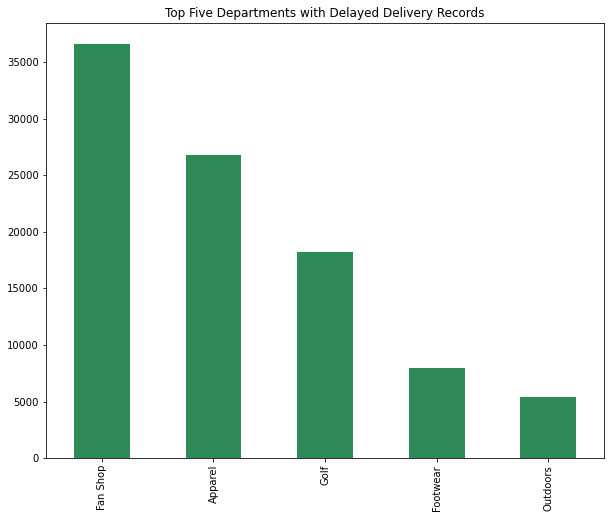

In [97]:
plt.title("Top Five Departments with Delayed Delivery Records")
top_late_dept.plot.bar(figsize=(10,8),color='seagreen')
plt.show()

* We see a trend in Department as well. Hence we keep the Department Id feature.

##### Order destination related features
* We have features like Order City, Order Country,Order Item Quantity, Order Region,Order Status.
* We pre

In [98]:
new_df['Order Status'].unique()

array(['COMPLETE', 'PENDING', 'CLOSED', 'PENDING_PAYMENT', 'CANCELED',
       'PROCESSING', 'SUSPECTED_FRAUD', 'ON_HOLD', 'PAYMENT_REVIEW'],
      dtype=object)

In [99]:
new_df['Order Item Quantity'].unique()

array([1, 2, 3, 5, 4], dtype=int64)

In [100]:
new_df[new_df['Order Item Quantity']==1]['Delivery Status'].value_counts()

Late delivery        54405
Advance shipping     22763
Shipping on time     17736
Shipping canceled     4230
Name: Delivery Status, dtype: int64

In [101]:
new_df[new_df['Order Item Quantity']==2]['Delivery Status'].value_counts()

Late delivery        11039
Advance shipping      4698
Shipping on time      3660
Shipping canceled      918
Name: Delivery Status, dtype: int64

In [102]:
new_df[new_df['Order Item Quantity']==3]['Delivery Status'].value_counts()

Late delivery        11216
Advance shipping      4694
Shipping on time      3563
Shipping canceled      877
Name: Delivery Status, dtype: int64

In [103]:
new_df[new_df['Order Item Quantity']==4]['Delivery Status'].value_counts()

Late delivery        11147
Advance shipping      4689
Shipping on time      3645
Shipping canceled      854
Name: Delivery Status, dtype: int64

In [104]:
new_df[new_df['Order Item Quantity']==5]['Delivery Status'].value_counts()

Late delivery        11170
Advance shipping      4748
Shipping on time      3592
Shipping canceled      875
Name: Delivery Status, dtype: int64

* We keep the features Order Status, Order Region, Order Country, and Order City.
* We drop the Order Item Quantity as almost all the number of items have a similar Delivery Distribution.

In [105]:
#Shipping Mode
new_df['Shipping Mode'].value_counts()

Standard Class    107752
Second Class       35216
First Class        27814
Same Day            9737
Name: Shipping Mode, dtype: int64

In [106]:
new_df[new_df['Shipping Mode']=='Standard Class']['Delivery Status'].value_counts()

Advance shipping     41592
Late delivery        41023
Shipping on time     20538
Shipping canceled     4599
Name: Delivery Status, dtype: int64

In [107]:

new_df[new_df['Shipping Mode']=='Second Class']['Delivery Status'].value_counts()

Late delivery        26987
Shipping on time      6819
Shipping canceled     1410
Name: Delivery Status, dtype: int64

In [108]:

new_df[new_df['Shipping Mode']=='First Class']['Delivery Status'].value_counts()

Late delivery        26513
Shipping canceled     1301
Name: Delivery Status, dtype: int64

In [109]:

new_df[new_df['Shipping Mode']=='Same Day']['Delivery Status'].value_counts()

Shipping on time     4839
Late delivery        4454
Shipping canceled     444
Name: Delivery Status, dtype: int64

* We can use Shipment Mode as a good indicator of Late_risk_delivery status.

In [110]:
new_df.columns

Index(['Days for shipping (real)', 'Days for shipment (scheduled)',
       'Delivery Status', 'Late_delivery_risk', 'Category Id', 'Category Name',
       'Customer City', 'Customer Country', 'Customer Segment',
       'Customer Zipcode', 'Department Id', 'Department Name', 'Order City',
       'Order Country', 'order date (DateOrders)', 'Order Item Quantity',
       'Order Region', 'Order Status', 'Product Status',
       'shipping date (DateOrders)', 'Shipping Mode'],
      dtype='object')

##### Dropping the mentioned columns as part of Advanced Feature Reduction

In [111]:
print("Number of features before advanced feature reduction is",new_df.shape[1])

Number of features before advanced feature reduction is 21


In [112]:
new_df = new_df.drop([ 'Product Status','Category Name','Department Name','Customer Zipcode','Customer City','Order Item Quantity'],axis=1)

In [113]:
print("Number of features after advanced feature reduction is",new_df.shape[1])

Number of features after advanced feature reduction is 15


### Milestone 3 - Exploratory Data Analysis

In [114]:
new_df.describe()

,Days for shipping (real),Days for shipment (scheduled),Late_delivery_risk,Category Id,Department Id
count,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000
mean,3.497654,2.931847,0.548291,31.851451,5.443460
std,1.623722,1.374449,0.497664,15.640064,1.629246
min,0.000000,0.000000,0.000000,2.000000,2.000000
25%,2.000000,2.000000,0.000000,18.000000,4.000000
50%,3.000000,4.000000,1.000000,29.000000,5.000000
75%,5.000000,4.000000,1.000000,45.000000,7.000000
max,6.000000,4.000000,1.000000,76.000000,12.000000


### 3.1 Univariate Analysis

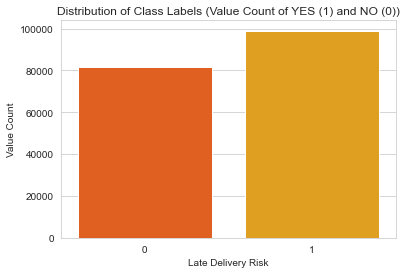

In [115]:
#Count of Class Labels - CountPlot

sns.set_style("whitegrid")
sns.countplot(x='Late_delivery_risk', data=new_df, palette='autumn')

plt.title("Distribution of Class Labels (Value Count of YES (1) and NO (0))")
plt.xlabel("Late Delivery Risk")
plt.ylabel("Value Count")
plt.show()

* There are more orders that have Late Delivery Risk.

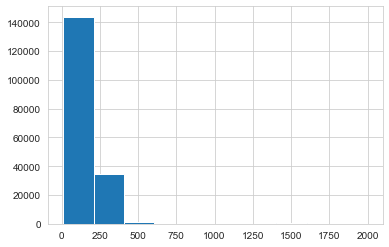

In [116]:
#product pricing 
plt.hist(df['Product Price'])
plt.show()

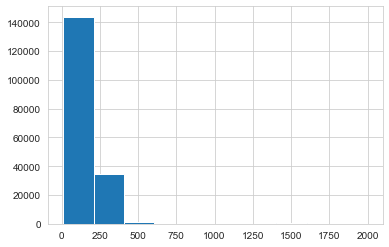

In [117]:
#product pricing 
plt.hist(df['Order Item Product Price'])
plt.show()

* Both 'Order Item Product Price' and 'Product Price' share the same distribution. That is, they depict the same information.

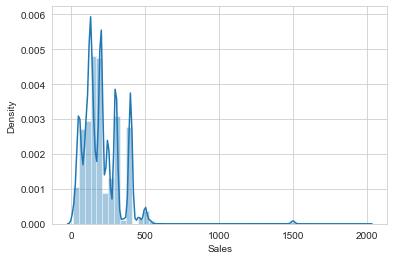

In [118]:
sns.distplot(df['Sales'],kde=True)

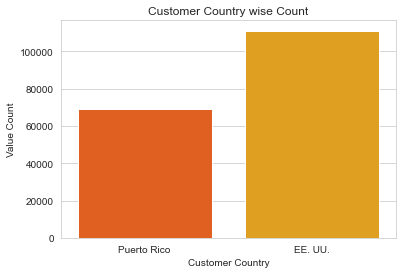

In [119]:
#Count of Class Labels - CountPlot

sns.set_style("whitegrid")
sns.countplot(x='Customer Country', data=new_df, palette='autumn')

plt.title("Customer Country wise Count")
plt.xlabel("Customer Country")
plt.ylabel("Value Count")
plt.show()

* More orders placed from EE. UU. countries.

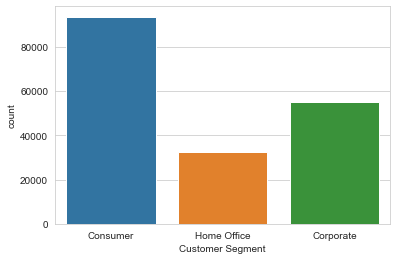

In [120]:
plt.figure()
sns.countplot(new_df['Customer Segment'])
plt.show()

* More orders placed in the 'Consumer Segment'. 
* Least orders in Home/Office Segment.

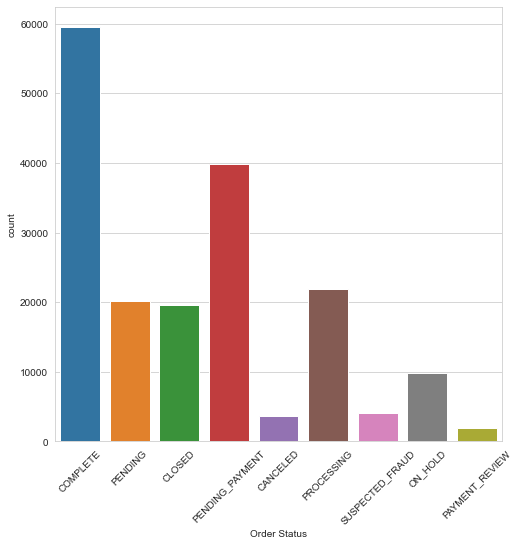

In [121]:
plt.figure(figsize=(8,8))
sns.countplot(new_df['Order Status'])
plt.xticks(rotation=45,fontsize=10)
plt.show()

* Most orders are completed where-as there are many orders that have payment pending as well.
* A few orders have fraud suspection.

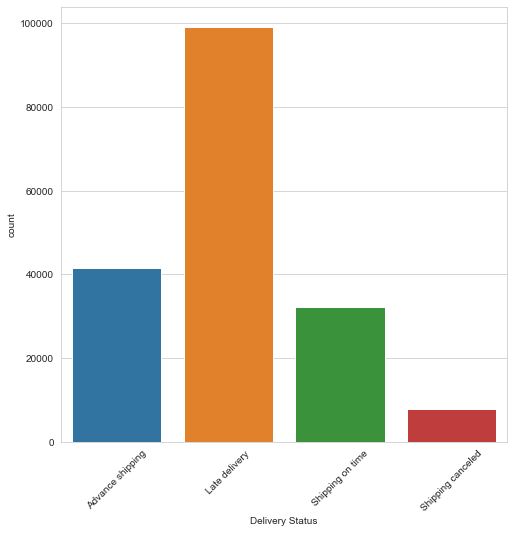

In [122]:
plt.figure(figsize=(8,8))
sns.countplot(new_df['Delivery Status'])
plt.xticks(rotation=45,fontsize=10)
plt.show()

* Most orders have Late Delivery where-as about half the same number have advance shipping.
* Only less that 35,000 orders are shipped on time.
* Only few orders get cancelled compared to total number of orders.

In [123]:
deliv_status_region = df.groupby(['Delivery Status', 'Order Region'])['Order Id'].count().reset_index(name='Number of Orders').sort_values(by= 'Number of Orders', ascending= False)
deliv_status_region.head()

,Delivery Status,Order Region,Number of Orders
26,Late delivery,Central America,15518
45,Late delivery,Western Europe,15140
35,Late delivery,South America,8111
3,Advance shipping,Central America,6566
22,Advance shipping,Western Europe,6138


In [124]:
deliv_status_region[deliv_status_region['Delivery Status']=='Late delivery'].max()

Delivery Status      Late delivery
Order Region        Western Europe
Number of Orders             15518
dtype: object

In [125]:
deliv_status_region[deliv_status_region['Delivery Status']=='Late delivery'].min()

Delivery Status     Late delivery
Order Region               Canada
Number of Orders              306
dtype: object

* Western Europe has maximum number of late deliveries where as Canada has the minimum.

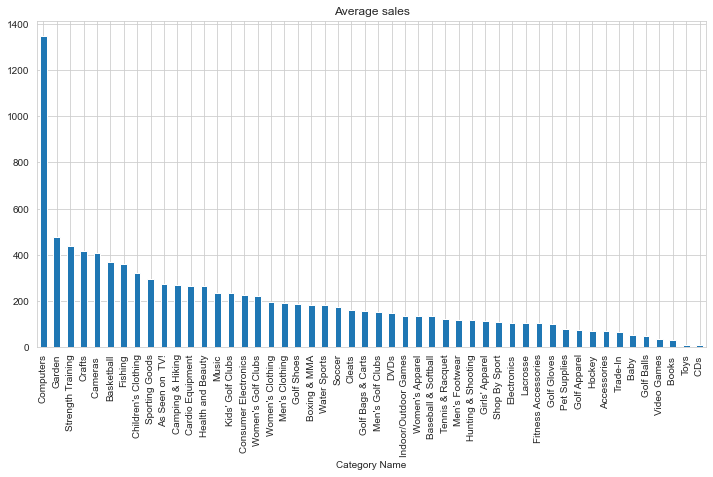

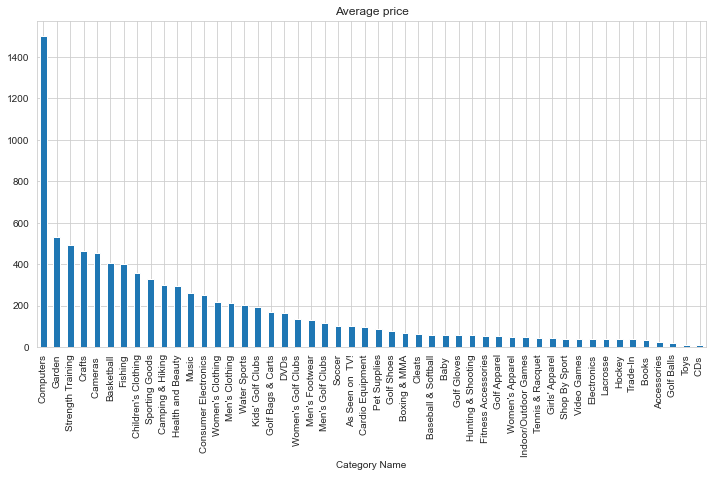

In [126]:
#Category wise sales and pricing 

categ = df.groupby('Category Name')

# getting sales mean for all categories
plt.figure(1)
categ['Sales per customer'].mean().sort_values(ascending=False).plot.bar(figsize=(12,6), title="Average sales")

plt.figure(2)
#getting prices meanfor all categories
categ['Product Price'].mean().sort_values(ascending=False).plot.bar(figsize=(12,6), title="Average price")

* There can be seen a trend in the average prices of various categories. 
* Computers and Electronics have a greater average price and the sales are also on increase.
* CD's which have almost become obsolete have very less pricing and sales.

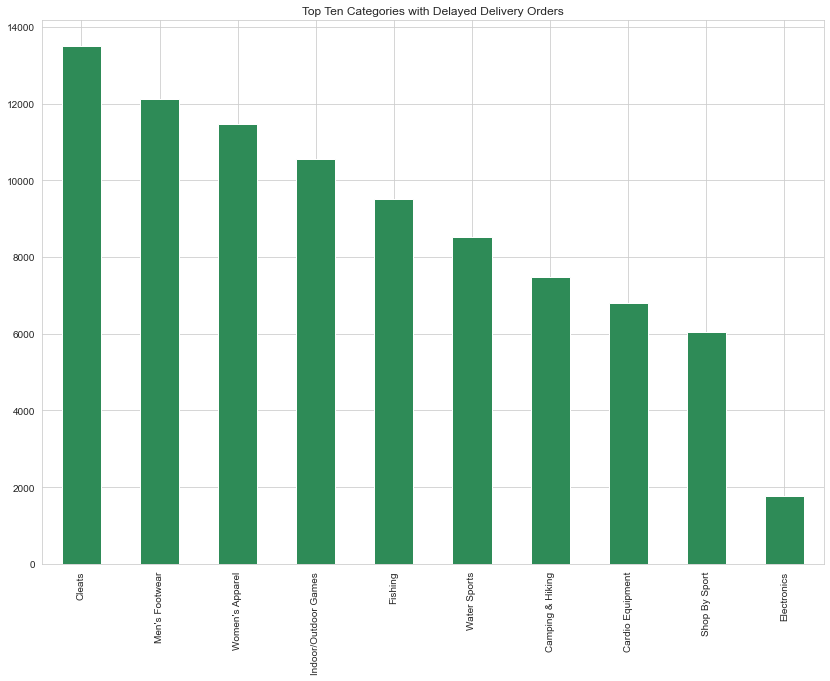

In [127]:
plt.title("Top Ten Categories with Delayed Delivery Orders")
top_10_late.plot.bar(figsize=(14,10),color='seagreen')
plt.show()

* Cleats have the notorious record of delayed deliveries followed by Men's footwear.
* Orders for Electronics and Sports items are also delayed though not much in number

In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 53 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Id                    180519 non-null  int64  
 8   Category Name                  180519 non-null  object 
 9   Customer City                  180519 non-null  object 
 10  Customer Country               180519 non-null  object 
 11  Customer Email                 180519 non-null  object 
 12  Customer Fname                

### 3.2 Bi-variate Analysis

In [129]:
#Scatter Plots 

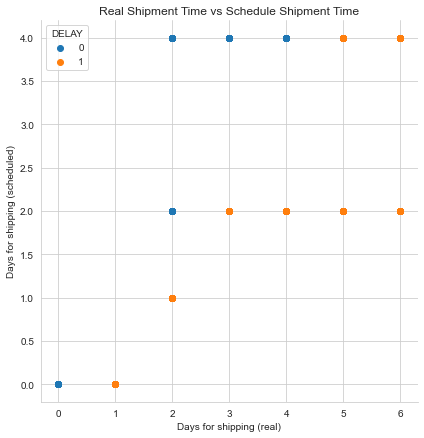

In [130]:
#1 - Plotting between Real Shipment Time and Schedule Shipment Time 
sns.set_style("whitegrid")
sns.FacetGrid(new_df, hue="Late_delivery_risk", height=6) \
 .map(plt.scatter, "Days for shipping (real)", "Days for shipment (scheduled)") \

plt.title("Real Shipment Time vs Schedule Shipment Time")
plt.ylabel("Days for shipping (scheduled)")
plt.xlabel("Days for shipping (real)")
plt.legend(title="DELAY")
plt.show()

* Most of the 4-day period items have been shipped properly.

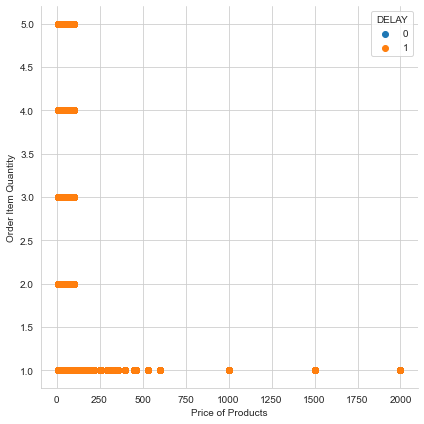

In [131]:
sns.set_style("whitegrid")
sns.FacetGrid(df, hue="Late_delivery_risk", height=6) \
 .map(plt.scatter, "Product Price", "Order Item Quantity") \

plt.ylabel("Order Item Quantity")
plt.xlabel("Price of Products")
plt.legend(title="DELAY")
plt.show()

* No major impact of late delivery risk in price and quantity.

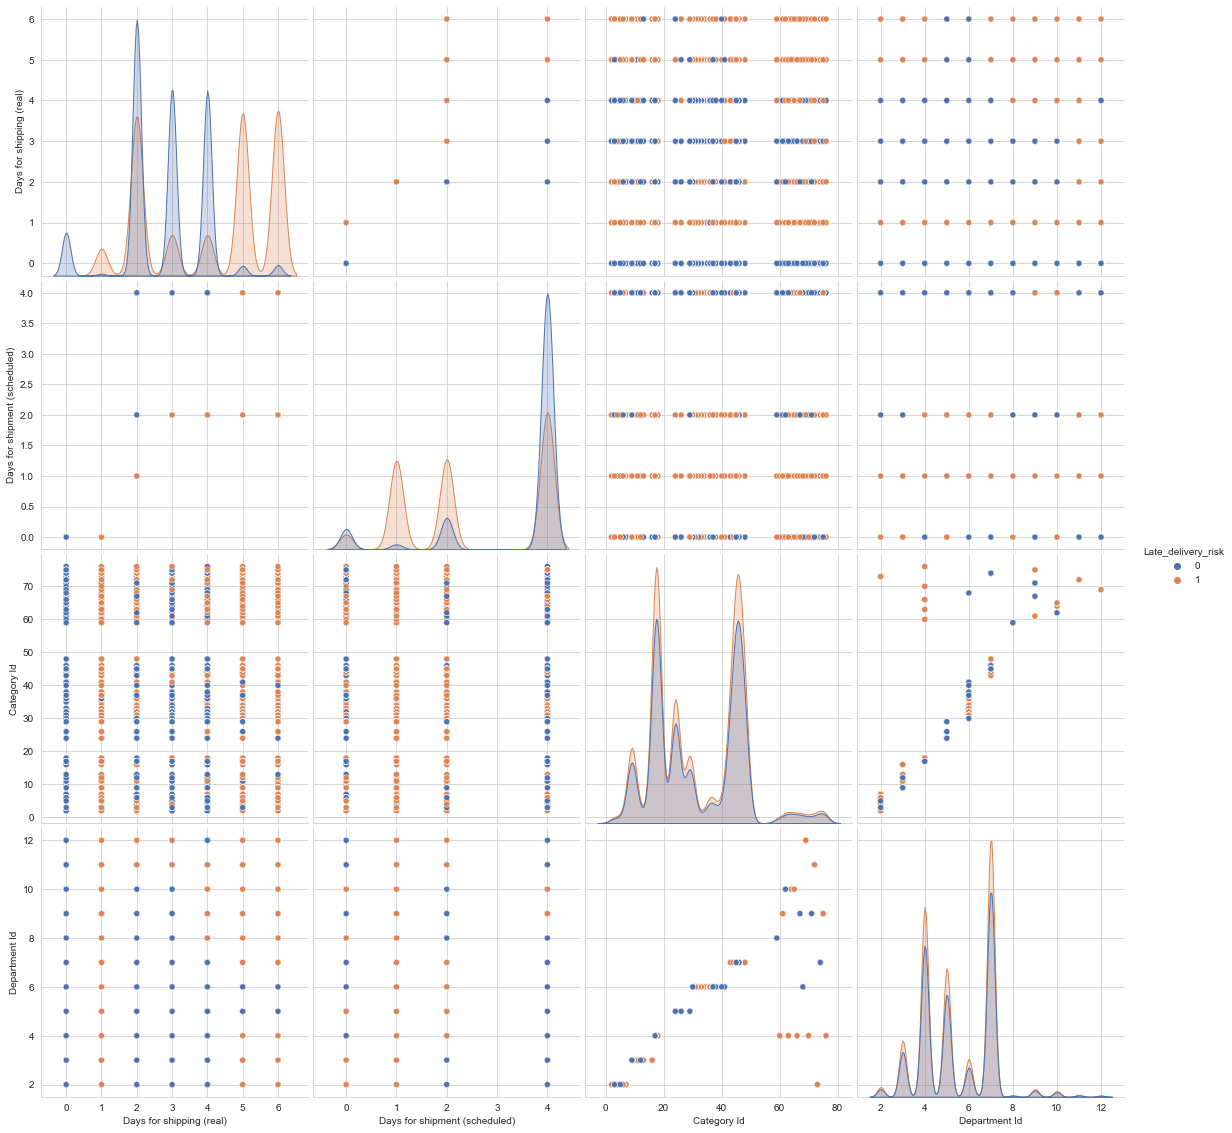

In [132]:
plt.close()
sns.set_style("whitegrid");
sns.pairplot(new_df, hue="Late_delivery_risk", size=4, palette='deep')
plt.show()

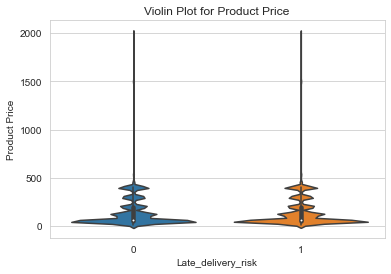

In [133]:
sns.violinplot(x="Late_delivery_risk",y="Product Price",data=df, height=10)
plt.title('Violin Plot for Product Price')
plt.show()

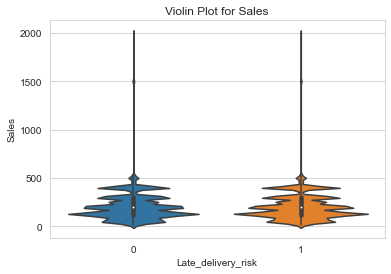

In [134]:
sns.violinplot(x="Late_delivery_risk",y="Sales",data=df, height=10)
plt.title('Violin Plot for Sales')
plt.show()

### 3.3 Multivariate Analysis

In [135]:
# sns.jointplot(x="Days for shipping (real)",y="Days for shipment (scheduled)",data=new_df,kind="kde")
# plt.grid()
# plt.show()

* There is a concentration of schedule delivery of 1 day being delivered on 2nd day resulting in late delivery.
* Also, a delayed delivery can be seen upto 6 days for scheduled delivery of 4 days.

### Milestone 4 - Model Building

In [136]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 15 columns):
 #   Column                         Non-Null Count   Dtype 
---  ------                         --------------   ----- 
 0   Days for shipping (real)       180519 non-null  int64 
 1   Days for shipment (scheduled)  180519 non-null  int64 
 2   Delivery Status                180519 non-null  object
 3   Late_delivery_risk             180519 non-null  int64 
 4   Category Id                    180519 non-null  int64 
 5   Customer Country               180519 non-null  object
 6   Customer Segment               180519 non-null  object
 7   Department Id                  180519 non-null  int64 
 8   Order City                     180519 non-null  object
 9   Order Country                  180519 non-null  object
 10  order date (DateOrders)        180519 non-null  object
 11  Order Region                   180519 non-null  object
 12  Order Status                   180519 non-nu

##### Other columns to drop
* Since we have to predict the Late delivery risk, we need to train the model after removing the Days for shipping (real),order date (DateOrders),shipping date (DateOrders), Delivery Status to avoid unfair training.

In [137]:
print("Number of features before final feature reduction is",new_df.shape[1])

Number of features before final feature reduction is 15


In [138]:
new_df = new_df.drop([ 'Delivery Status','shipping date (DateOrders)','order date (DateOrders)','Days for shipping (real)'],axis=1)

In [139]:
print("Number of features after final feature reduction is",new_df.shape[1])

Number of features after final feature reduction is 11


### Encoding Features (comes under Milestone 2)

In [140]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 11 columns):
 #   Column                         Non-Null Count   Dtype 
---  ------                         --------------   ----- 
 0   Days for shipment (scheduled)  180519 non-null  int64 
 1   Late_delivery_risk             180519 non-null  int64 
 2   Category Id                    180519 non-null  int64 
 3   Customer Country               180519 non-null  object
 4   Customer Segment               180519 non-null  object
 5   Department Id                  180519 non-null  int64 
 6   Order City                     180519 non-null  object
 7   Order Country                  180519 non-null  object
 8   Order Region                   180519 non-null  object
 9   Order Status                   180519 non-null  object
 10  Shipping Mode                  180519 non-null  object
dtypes: int64(4), object(7)
memory usage: 15.1+ MB


* In the present df, Customer Country and Shipment Mode can be One Hot Encoded.
* Customer Segment, Order Status and Order Region can be Label Encoded.
* There are 100+ entries for Order Country and 3000+ entries in Order City. 
* We Label Encode these columns as well.

#### Label Encoding

##### Note on Limitation of Label Encoding:

* Label encoding converts the data in machine-readable form, but it assigns a unique number(starting from 0) to each class of data. This may lead to the generation of priority issues in the training of data sets. A label with a high value may be considered to have high priority than a label having a lower value.
* In some cases, it is preferable to map the values to the labels using the python mapping. This can to some extent control the bias.

In [141]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
 
#encode labels in column 'Customer Segment'.
new_df['Customer Segment']= label_encoder.fit_transform(new_df['Customer Segment'])
 
new_df['Customer Segment'].unique()

array([0, 2, 1])

In [142]:
new_df.head()

,Days for shipment (scheduled),Late_delivery_risk,Category Id,Customer Country,Customer Segment,Department Id,Order City,Order Country,Order Region,Order Status,Shipping Mode
0,4,0,73,Puerto Rico,0,2,Bekasi,Indonesia,Southeast Asia,COMPLETE,Standard Class
1,4,1,73,Puerto Rico,0,2,Bikaner,India,South Asia,PENDING,Standard Class
2,4,0,73,EE. UU.,0,2,Bikaner,India,South Asia,CLOSED,Standard Class
3,4,0,73,EE. UU.,2,2,Townsville,Australia,Oceania,COMPLETE,Standard Class
4,4,0,73,Puerto Rico,1,2,Townsville,Australia,Oceania,PENDING_PAYMENT,Standard Class


In [143]:
new_df['Order Status'].unique()

array(['COMPLETE', 'PENDING', 'CLOSED', 'PENDING_PAYMENT', 'CANCELED',
       'PROCESSING', 'SUSPECTED_FRAUD', 'ON_HOLD', 'PAYMENT_REVIEW'],
      dtype=object)

In [144]:
#encode labels in column 'Order Status'.
new_df['Order Status']= label_encoder.fit_transform(new_df['Order Status'])
 
new_df['Order Status'].unique()

array([2, 5, 1, 6, 0, 7, 8, 3, 4])

In [145]:
#encode labels in column 'Order Region'.
new_df['Order Region']= label_encoder.fit_transform(new_df['Order Region'])
 
new_df['Order Region'].unique()

array([15, 13, 11,  7, 20, 21, 18, 19,  2,  9, 22, 10,  3,  1, 12,  5, 17,
        6,  0, 16,  4,  8, 14])

In [146]:
#encode labels in column 'Order Country'.
new_df['Order Country']= label_encoder.fit_transform(new_df['Order Country'])
 
new_df['Order Country'].unique()

array([ 70,  69,   8,  31,  77,  34, 133, 152,  98,  48, 106, 123, 130,
        94,   2,  53, 115, 120,  59,  42, 112, 124, 158,  33,  66,  20,
       102, 156,   6,  38, 116, 105,  40,   3, 139, 135,  36,  41,  75,
        47, 141,   9,  28,  91,   5,  85, 162, 109, 138, 100, 147, 127,
        74, 108,  11, 145,  71,   4,  51,  79,  73, 101, 157,  15,  27,
        80, 149, 154, 117, 118, 128, 150,   0, 111, 159,  92,  52, 129,
        72, 107,  45,  25,  17,  30,  76, 160,  56,  61,  50,  21,  81,
        55, 104,  43,  26, 155,  84,  87, 142,  68,  39,  65,  16,  37,
        83,  13,  90, 122, 136, 163,  44,  22,  35,  86,  12, 148, 134,
        58, 113,  10, 151, 114,  78,  67,  95,  97, 119,  93,   1, 126,
        18, 110, 153, 132, 161,  23,  99,  54, 140,  88, 103,  96,  57,
       137,  64,  60, 121, 146,  49,  89,  32,  63, 143,  14,  46, 125,
        19,   7,  62,  82,  24,  29, 131, 144])

In [147]:
#encode labels in column 'Order City'.
new_df['Order City']= label_encoder.fit_transform(new_df['Order City'])
 
new_df['Order City'].unique()

array([ 331,  391, 3226, ..., 3205, 1849, 2227])

#### One Hot Encoding (Get Dummies)

In [148]:
#customer country
Cust_Country = pd.get_dummies(new_df['Customer Country'])
Cust_Country.head()

,EE. UU.,Puerto Rico
0,0,1
1,0,1
2,1,0
3,1,0
4,0,1


In [149]:
#shipment mode
Ship_Mode = pd.get_dummies(new_df['Shipping Mode'])
Ship_Mode.head()

,First Class,Same Day,Second Class,Standard Class
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1


In [150]:
#dropping shipping mode and customer country columns
new_df.drop(['Shipping Mode','Customer Country'],axis=1,inplace=True)

In [151]:
new_df = pd.concat([new_df,Cust_Country,Ship_Mode],axis=1)

In [152]:
new_df.head()

,Days for shipment (scheduled),Late_delivery_risk,Category Id,Customer Segment,Department Id,Order City,Order Country,Order Region,Order Status,EE. UU.,Puerto Rico,First Class,Same Day,Second Class,Standard Class
0,4,0,73,0,2,331,70,15,2,0,1,0,0,0,1
1,4,1,73,0,2,391,69,13,5,0,1,0,0,0,1
2,4,0,73,0,2,391,69,13,1,1,0,0,0,0,1
3,4,0,73,2,2,3226,8,11,2,1,0,0,0,0,1
4,4,0,73,1,2,3226,8,11,6,0,1,0,0,0,1


In [153]:
new_df.columns

Index(['Days for shipment (scheduled)', 'Late_delivery_risk', 'Category Id',
       'Customer Segment', 'Department Id', 'Order City', 'Order Country',
       'Order Region', 'Order Status', 'EE. UU.', 'Puerto Rico', 'First Class',
       'Same Day', 'Second Class', 'Standard Class'],
      dtype='object')

In [154]:
#final dataframe for model building 
final_df = new_df
final_df.shape

(180519, 15)

In [155]:
X = final_df[['Days for shipment (scheduled)','Category Id',
       'Customer Segment', 'Department Id', 'Order City', 'Order Country',
       'Order Region', 'Order Status', 'EE. UU.', 'Puerto Rico', 'First Class',
       'Same Day', 'Second Class', 'Standard Class']]
y = final_df['Late_delivery_risk']

In [156]:
X.shape

(180519, 14)

In [157]:
y.shape

(180519,)

### Train Test Splitting

In [158]:
from sklearn.model_selection import train_test_split

In [159]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=42)

### Model Training and Prediction

In [160]:
#The baseline prediction for the model is 1/3
final_df['Late_delivery_risk'].value_counts(normalize= True)

1    0.548291
0    0.451709
Name: Late_delivery_risk, dtype: float64

Baseline prediction is the probability of predicting class before the model is implemented. If the data is split into 2 classes almost evenly (as in the dataset). Hence, there is already a 55% chance of randomly assigning an element to the Delivery Risk (1) class and 45% chance of assigning to No risk (0) class. 

#### 4.1 Logistic Regression

In [161]:
from sklearn.linear_model import LogisticRegression

#create the model instance
model = LogisticRegression()

In [162]:
#fit the model on the training data
model.fit(X_train, y_train)

#predictions
y_pred1 = model.predict(X_test)

In [163]:
#checking score, or accuracy of the model
model.score(X_test, y_test)

0.6839131398183027

In [164]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
print("Accuracy for Logistic Regression is",round(accuracy_score(y_test,y_pred1),4))
print("Precision for Logistic Regression is",round(precision_score(y_test,y_pred1,average='macro'),4))
print("Recall for Logistic Regression is",round(recall_score(y_test,y_pred1,average='macro'),4))
print("F1-Score for Logistic Regression is",round(f1_score(y_test,y_pred1,average='macro'),4))

Accuracy for Logistic Regression is 0.6839
Precision for Logistic Regression is 0.7006
Recall for Logistic Regression is 0.695
F1-Score for Logistic Regression is 0.6832


In [165]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.61      0.81      0.70     20396
           1       0.79      0.58      0.67     24734

    accuracy                           0.68     45130
   macro avg       0.70      0.69      0.68     45130
weighted avg       0.71      0.68      0.68     45130



Text(34.0, 0.5, 'Actual Labels')

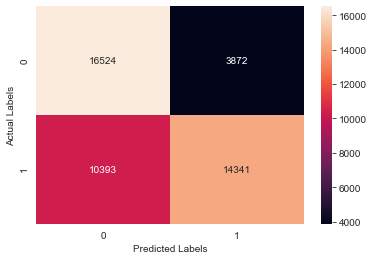

In [166]:
from sklearn.metrics import confusion_matrix

sns.heatmap(confusion_matrix(y_test,y_pred1),annot=True,fmt='g')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')

* We get an accuracy of 69% roughly with Logistic Regression model.

In [197]:
temp=[]
temp.append(['Logistic Regression',round(f1_score(y_test,y_pred1,average='macro'),5)])

#### 4.2 Decision Tree

In [168]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train) 

DecisionTreeClassifier()

In [170]:
dt_pred = dt.predict(X_test) 

In [171]:
#from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
print("Accuracy for Decision Tree is",round(accuracy_score(y_test,dt_pred),4))
print("Precision for Decision Tree is",round(precision_score(y_test,dt_pred,average='macro'),4))
print("Recall for Decision Tree is",round(recall_score(y_test,dt_pred,average='macro'),4))
print("F1-Score for Decision Tree is",round(f1_score(y_test,dt_pred,average='macro'),4))

Accuracy for Decision Tree is 0.7967
Precision for Decision Tree is 0.7951
Recall for Decision Tree is 0.7971
F1-Score for Decision Tree is 0.7957


In [172]:
#from sklearn.metrics import classification_report
print(classification_report(y_test, dt_pred))

              precision    recall  f1-score   support

           0       0.76      0.80      0.78     20396
           1       0.83      0.79      0.81     24734

    accuracy                           0.80     45130
   macro avg       0.80      0.80      0.80     45130
weighted avg       0.80      0.80      0.80     45130



Text(34.0, 0.5, 'Actual Labels')

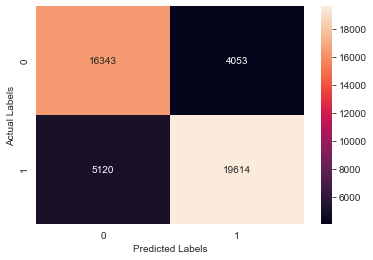

In [173]:
sns.heatmap(confusion_matrix(y_test,dt_pred),annot=True,fmt='g')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')

* We get an accuracy of 80 % roughly with Decision Tree model.

In [198]:
temp.append(['Decision Tree',round(f1_score(y_test,dt_pred,average='macro'),5)])

#### 4.3 Random Forest 

In [175]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [177]:
y_pred5 = rf.predict(X_test)

In [178]:
#from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
print("Accuracy for Random Forest is",round(accuracy_score(y_test,y_pred5),4))
print("Precision for Random Forest is",round(precision_score(y_test,y_pred5,average='macro'),4))
print("Recall for Random Forest is",round(recall_score(y_test,y_pred5,average='macro'),4))
print("F1-Score for Random Forest is",round(f1_score(y_test,y_pred5,average='macro'),4))

Accuracy for Random Forest is 0.755
Precision for Random Forest is 0.7532
Recall for Random Forest is 0.7549
F1-Score for Random Forest is 0.7537


In [179]:
#from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred5))

              precision    recall  f1-score   support

           0       0.72      0.75      0.74     20396
           1       0.79      0.76      0.77     24734

    accuracy                           0.75     45130
   macro avg       0.75      0.75      0.75     45130
weighted avg       0.76      0.75      0.76     45130



Text(34.0, 0.5, 'Actual Labels')

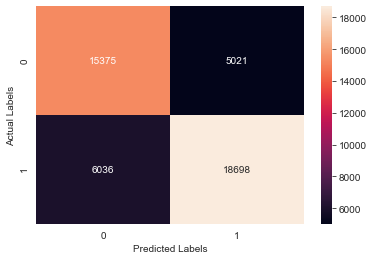

In [180]:
sns.heatmap(confusion_matrix(y_test,y_pred5),annot=True,fmt='g')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')

* We get an accuracy of 75 % roughly with Random Forest model.

In [199]:
temp.append(['Random Forest',round(f1_score(y_test,y_pred5,average='macro'),5)])

### Milestone 5 - Model Fine Tuning

#### 5.1 Cross Validation Score for Logistic Regression

In [182]:
#cross validate score for Logistic Reg model
#test score is already pretty high, but we can use the cross validated score to ensure the model's strength 
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X_train, y_train, cv=10)
print(np.mean(scores))

0.6831722326633615


In [200]:
temp.append(['Logist Regression CV Score',round(np.mean(scores),5)])

In [ ]:
#No major improvement in the Logistic Regression score using Cross Validation Score

#### 5.2 Hyperparameter Tuning using GridSearchCV for RF

In [184]:
from sklearn.model_selection import GridSearchCV

In [185]:
#hyperparameter tuning
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
#create a base model
rf2 = RandomForestClassifier()

#instantiate the grid search model
grid_search = GridSearchCV(estimator = rf2, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [186]:
grid_search.fit(X_train, y_train)
grid_search.best_params_

Fitting 3 folds for each of 144 candidates, totalling 432 fits


{'bootstrap': True,
 'max_depth': 100,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 1000}

In [187]:
#retraining the model with tuned parameters 
rf2 = RandomForestClassifier(bootstrap= True,
 max_depth= 110,
 min_samples_leaf= 5,
 min_samples_split= 8,
 n_estimators= 100,random_state=42)
rf2.fit(X_train,y_train)
rf2pred = rf2.predict(X_test)

print("The Accuracy for RandomForest model is",accuracy_score(y_test,rf2pred))

The Accuracy for RandomForest model is 0.7421449146908929


In [188]:
#accuracy is seen to fall on GridSearchCV

In [189]:
#from sklearn.metrics import classification_report
print(classification_report(y_test, rf2pred))

              precision    recall  f1-score   support

           0       0.68      0.83      0.74     20396
           1       0.83      0.67      0.74     24734

    accuracy                           0.74     45130
   macro avg       0.75      0.75      0.74     45130
weighted avg       0.76      0.74      0.74     45130



In [191]:
accuracy_score(y_test,rf2pred)

0.7421449146908929

In [201]:
temp.append(['Random Forest GridSearchCV Score',round(accuracy_score(y_test,rf2pred),5)])

#### 5.3 Cross Validation Score for Random Forest

In [193]:
#cross validation score for RF
from sklearn.model_selection import cross_val_score
scores2 = cross_val_score(rf, X_train, y_train, cv=10)
print(np.mean(scores2))

0.7516859372819554


In [ ]:
#No major improvement in the Random Forest score using Cross Validation Score

In [202]:
temp.append(['Random Forest CV Score',round(np.mean(scores2),5)])

### Performance Metric Comparison

In [203]:
performance_df = pd.DataFrame(temp, columns = ['Models', 'F1-Score'])

In [204]:
performance_df

,Models,F1-Score
0,Logistic Regression,0.68317
1,Decision Tree,0.79567
2,Random Forest,0.75366
3,Logist Regression CV Score,0.68317
4,Random Forest GridSearchCV Score,0.74214
5,Random Forest CV Score,0.75169


**Findings:**
* Decision Tree without hyperparameter tuning itself gives 80% accuracy on the dataset

In [ ]:
#Submitted by Sujith Narayanan
#DSA_B3 - 2021 October Batch